Predict whether a customer is likely to return

Decision Tree: 66.2%  
KNN:  70%  
Random Forest: 72.7%  
Naive Bayes: 74.8%  
Logistic Regression: 75.2%  
XGBoost: 75.4%  
CatBoost: 76.2%  
SVM:  76.5%  

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [33]:
data = pd.read_csv("../data/TechCorner_Sales_converted.csv", index_col=0)

In [34]:
data.columns

Index(['Date', 'Cus. Location', 'Age', 'Gender', 'Sell Price', 'from FB',
       'follows page', 'bought before', 'heard of shop', 'is_local', 'is_male',
       'Mobile Name_Galaxy M35 5G 8/128',
       'Mobile Name_Galaxy S24 Ultra 12/256', 'Mobile Name_Moto G85 5G 8/128',
       'Mobile Name_Narzo N53 4/64', 'Mobile Name_Note 11S 6/128',
       'Mobile Name_Note 14 Pro 5G 8/256', 'Mobile Name_Pixel 7a 8/128',
       'Mobile Name_Pixel 8 Pro 12/256', 'Mobile Name_R-70 Turbo 5G 6/128',
       'Mobile Name_Redmi Note 12 Pro 8/128', 'Mobile Name_Vivo T3x 5G 8/128',
       'Mobile Name_Vivo Y200 5G 6/128', 'Mobile Name_iPhone 16 Pro 256GB',
       'Mobile Name_iPhone 16 Pro Max 1TB',
       'Mobile Name_iQOO Neo 9 Pro 5G 12/256', 'Mobile Name_iQOO Z7 5G 6/128'],
      dtype='object')

Define Target and Features

In [35]:
# Target column: binary encoded version of returning customer status
y = data['bought before']

# Drop target and irrelevant columns
X = data.drop(columns=['Date', 'Cus. Location', 'Gender', 'bought before'])

Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)

Check class imbalance, correct with SMOTE

In [37]:
# Check class imbalance
print(y_train.value_counts())

bought before
0    5341
1    1755
Name: count, dtype: int64


In [38]:
# Apply SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=7)    
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [39]:
# Check class imbalance
print(y_train_sm.value_counts())

bought before
0    5341
1    5341
Name: count, dtype: int64


Scale age and sell price

In [40]:
sc = StandardScaler()
X_train_scaled = X_train_sm.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Age', 'Sell Price']] = sc.fit_transform(X_train_scaled[['Age', 'Sell Price']])
X_test_scaled[['Age', 'Sell Price']] = sc.fit_transform(X_test_scaled[['Age', 'Sell Price']])

Train and compare classifier models

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [42]:
# Decision Tree scaled
clf = tree.DecisionTreeClassifier()
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.6618748236440528


In [43]:
# KNN was better not scaled
clf = KNeighborsClassifier()
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.6605667663899302


In [44]:
# KNN
clf = KNeighborsClassifier()
cv = cross_val_score(clf, X_train, y_train, cv = 5)
print(cv.mean())

0.7030727848415369


In [45]:
# Random Forest scaled
clf = RandomForestClassifier(random_state = 7)
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.7268539062951843


In [46]:
# Naive Bayes was better not scaled
clf = GaussianNB()
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.713096827958968


In [47]:
# Naive Bayes
clf = GaussianNB()
cv = cross_val_score(clf, X_train, y_train, cv = 5)
print(cv.mean())

0.7477451885378515


In [48]:
# Logistic Regression scaled
clf = LogisticRegression(max_iter = 1000)
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.7521398000977954


In [49]:
# XGBoost scaled
clf = XGBClassifier(random_state = 7)
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.7542891957117244


Feature importance plot for XGBoost

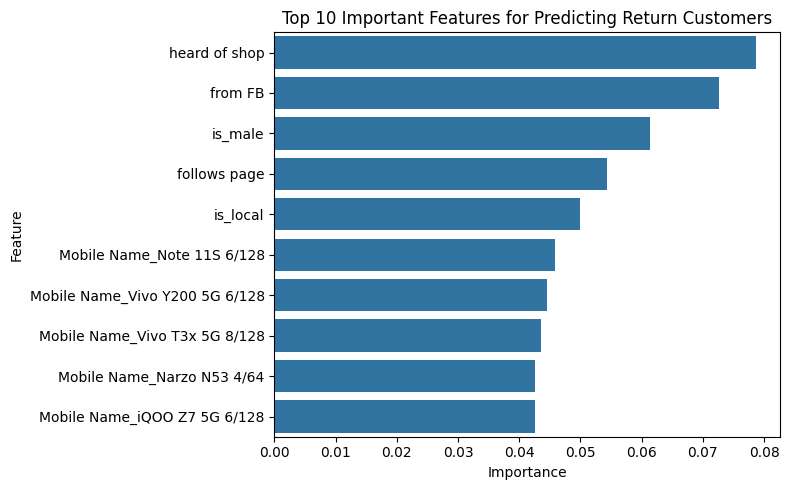

In [50]:
# Fit the XGBoost model
clf.fit(X_train_scaled, y_train_sm)

importances = clf.feature_importances_
feat_names = X.columns

# Create a dataframe for visualization
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Top 10 Important Features for Predicting Return Customers')
plt.tight_layout()
plt.show()

In [51]:
# CatBoost scaled
clf = CatBoostClassifier()
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

Learning rate set to 0.02575
0:	learn: 0.6870941	total: 156ms	remaining: 2m 35s
1:	learn: 0.6814941	total: 163ms	remaining: 1m 21s
2:	learn: 0.6761860	total: 168ms	remaining: 55.9s
3:	learn: 0.6715898	total: 174ms	remaining: 43.3s
4:	learn: 0.6672403	total: 180ms	remaining: 35.7s
5:	learn: 0.6625676	total: 186ms	remaining: 30.7s
6:	learn: 0.6583487	total: 191ms	remaining: 27.1s
7:	learn: 0.6542730	total: 197ms	remaining: 24.4s
8:	learn: 0.6504284	total: 203ms	remaining: 22.3s
9:	learn: 0.6470833	total: 209ms	remaining: 20.7s
10:	learn: 0.6439586	total: 215ms	remaining: 19.3s
11:	learn: 0.6406981	total: 220ms	remaining: 18.1s
12:	learn: 0.6374998	total: 227ms	remaining: 17.2s
13:	learn: 0.6343995	total: 233ms	remaining: 16.4s
14:	learn: 0.6318728	total: 239ms	remaining: 15.7s
15:	learn: 0.6290649	total: 245ms	remaining: 15.1s
16:	learn: 0.6264144	total: 251ms	remaining: 14.5s
17:	learn: 0.6241123	total: 257ms	remaining: 14s
18:	learn: 0.6220527	total: 263ms	remaining: 13.6s
19:	learn: 0

In [52]:
# SVM scaled
clf = SVC(probability = True)
cv = cross_val_score(clf, X_train_scaled, y_train_sm, cv = 5)
print(cv.mean())

0.7650606226306962


Evaluate the SVM model

In [53]:
# Fit the SVM model
clf.fit(X_train_scaled, y_train_sm)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83      1336
           1       0.24      0.06      0.10       439

    accuracy                           0.72      1775
   macro avg       0.50      0.50      0.47      1775
weighted avg       0.63      0.72      0.65      1775

Confusion Matrix:
 [[1252   84]
 [ 412   27]]


Tune the SVM with GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [58]:
pipe = Pipeline([
    ('svc', SVC())
])

# Define hyperparameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit to training data
grid.fit(X_train_scaled, y_train_sm)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Score (cross-validated):", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Score (cross-validated): 0.7650606226306962
